# Лабраторная работа №1

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

## Подключение

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model # формирует картинку со схемой модели

# Простейший MLP на примере $sin(x)$. Ошибки

## Функция $sin(x)$

In [2]:
def F(x):
  res=np.sin(x)
  return res

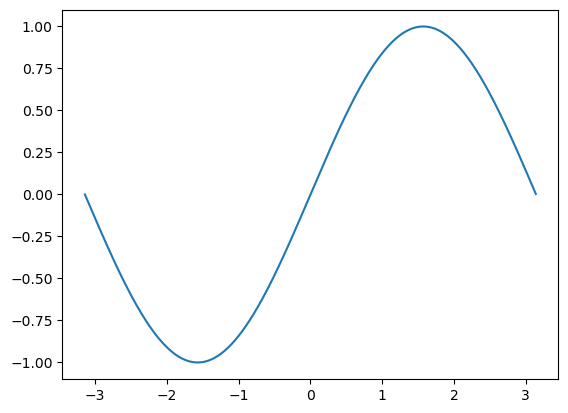

629


In [3]:
x=np.arange(-np.pi, np.pi, 0.01)

y=np.zeros(x.size)
for i in range(x.size):
  y[i]=F(x[i])
plt.plot(x,y)
plt.show()
print(x.size)

## Комбинация сигмоид

In [4]:
def Sigmoid(x):
  res=1/(1+np.exp(-x))
  return res

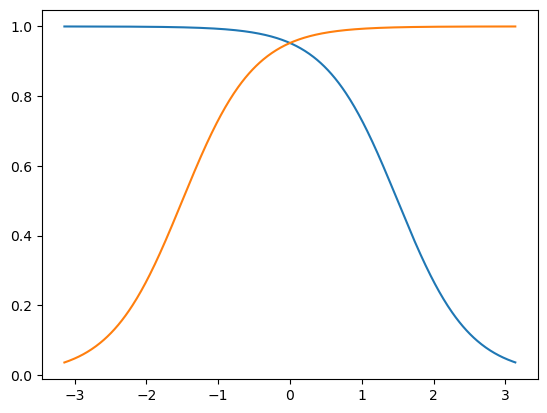

In [5]:
a1=np.zeros(x.size)
a2=np.zeros(x.size)

w1=-2
w2=2
b1=3
b2=3
for i in range(x.size):
  a1[i]=x[i]*w1+b1
  a2[i]=x[i]*w2+b2
y1=np.zeros(x.size)
y2=np.zeros(x.size)

for i in range(x.size):
  y1[i]=Sigmoid(a1[i])
  y2[i]=Sigmoid(a2[i])
#x=x/np.pi
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

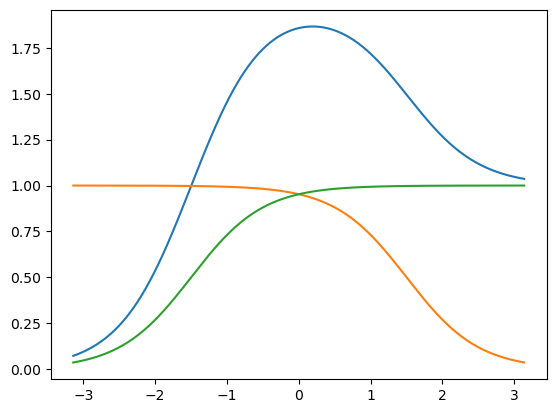

In [6]:
z=np.zeros(x.size)
v1=1
v2=2.
bb1=-1.
for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+bb1;
plt.plot(x,z)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

## Задание 0
Поменяйте веса $y$ так, чтобы результирующий график зеркально отобразился по горизонтали и по вериткали

### Результирующий график

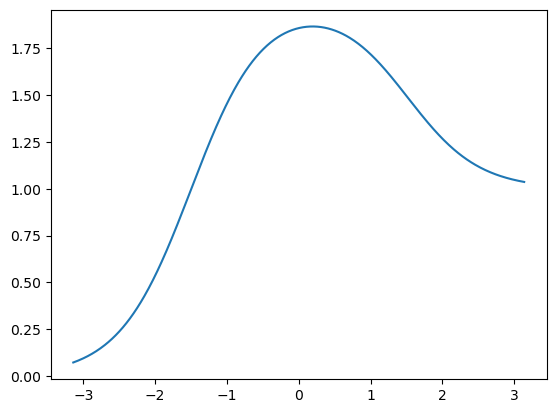

In [7]:
z=np.zeros(x.size)
v1=1
v2=2
bb1=-1
for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+bb1;
plt.plot(x,z)
plt.show()

### Отображение по горизонатли

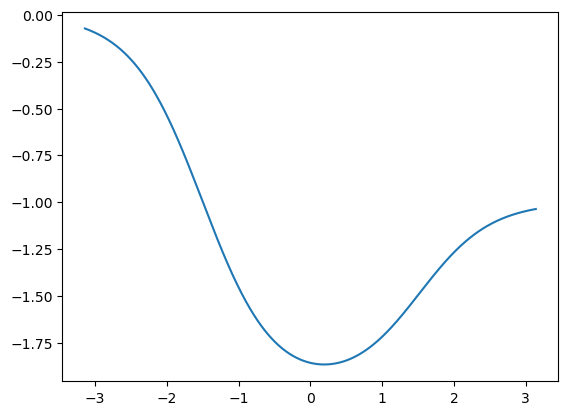

In [8]:
z=np.zeros(x.size)
v1=-1
v2=-2
bb1=1
for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+bb1;
plt.plot(x,z)
plt.show()

### Отображение по вертикали

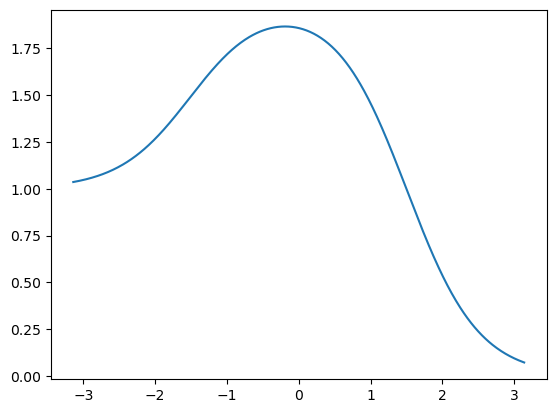

In [9]:
z=np.zeros(x.size)
v1=2
v2=1
bb1=-1
for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+bb1;
plt.plot(x,z)
plt.show()

## Задание 1

Подберите "руками" коэффициенты для трех сигмоид так, чтобы из них получилось что-то похожее на $sin(x)$ в диапазоне от $-\pi$ до $\pi$

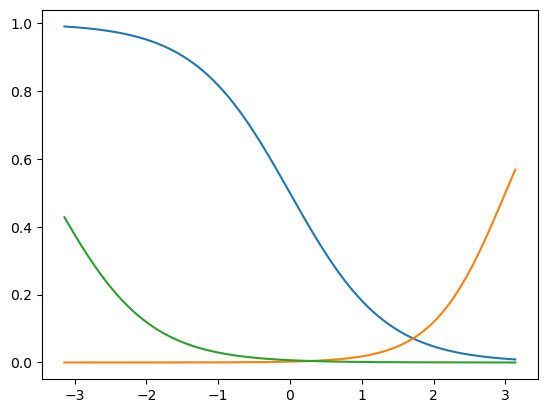

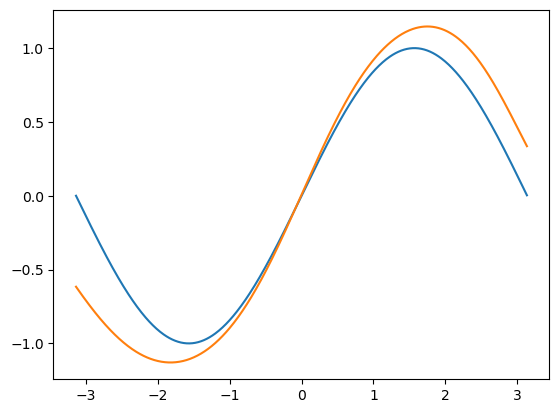

In [10]:
a1=np.zeros(x.size)
a2=np.zeros(x.size)
a3=np.zeros(x.size)

w1=-1.5
w2=2
w3=-1.5
b1=0
b2=-6
b3=-5
for i in range(x.size):
  a1[i]=x[i]*w1+b1
  a2[i]=x[i]*w2+b2
  a3[i]=x[i]*w3+b3
y1=np.zeros(x.size)
y2=np.zeros(x.size)
y3=np.zeros(x.size)

for i in range(x.size):
  y1[i]=Sigmoid(a1[i])
  y2[i]=Sigmoid(a2[i])
  y3[i]=Sigmoid(a3[i])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

z=np.zeros(x.size)
v1=-3
v2=-2
v3=2
bb1=1.5

for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+v3*y3[i]+bb1;
plt.plot(x,F(x))
plt.plot(x,z)
plt.show()

## KERAS

In [11]:
model = keras.Sequential() # последовательность, которую будем заполнять слоями
model.add(Input(shape=(1,)))
model.add(Dense(units=3, activation='sigmoid')) # добавляем слой из трех нейронов с активационной функцией сигмоидой
model.add(Dense(units=1, activation='linear')) # линейная активационная функция для последнего слоя
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1)) # вычисляем ошибку с помощью стохастического оптимизатора 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

None


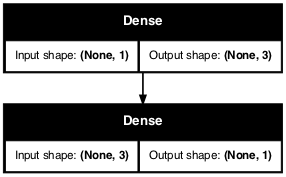

In [12]:
print(model.summary()) 
plot_model(model, dpi=60, show_shapes=True) # Выводим схему модели

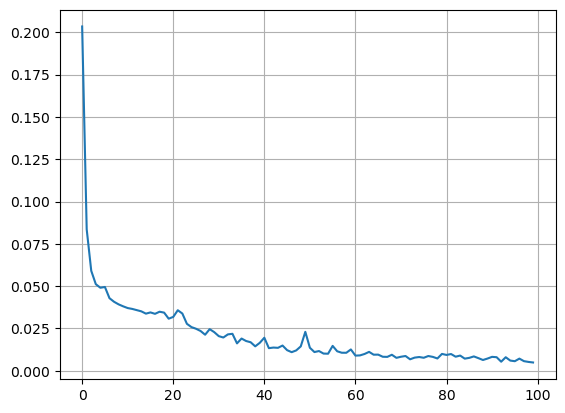

In [13]:
log = model.fit(x, y, epochs=100, verbose=False) # процедура туда-обратно-туда-обратно... (100 эпох: иксы будут сто раз ходить туда-обратно),
                                                 # т.е. мы учимся, подбирая параметры, которые сделают ошибку маленькой
plt.plot(log.history['loss']) # показывает ошибку на каждой эпохе
plt.grid(True)
plt.show()

Похожи с sin (насколько это возможно)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


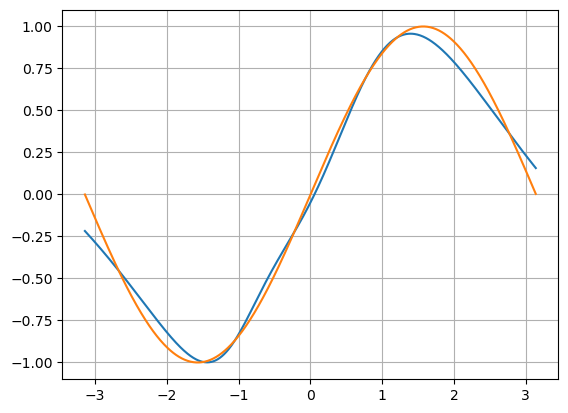

In [14]:
res=model.predict(x) # получаем предикт (тут уже готовые веса, которые мы перемножаем с иксами, которые хотим)
plt.plot(x,res)
plt.plot(x,y)
plt.grid(True)
plt.show()

Но они все-таки отличаются

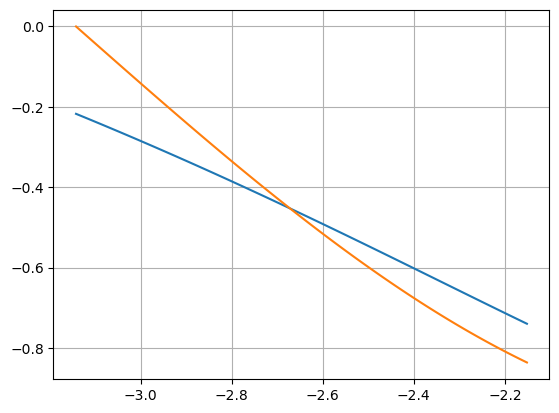

In [15]:
plt.plot(x[0:100],res[0:100])
plt.plot(x[0:100],y[0:100])
plt.grid(True)
plt.show()

Посмотрим на ошибку

(629, 1)
(629,)


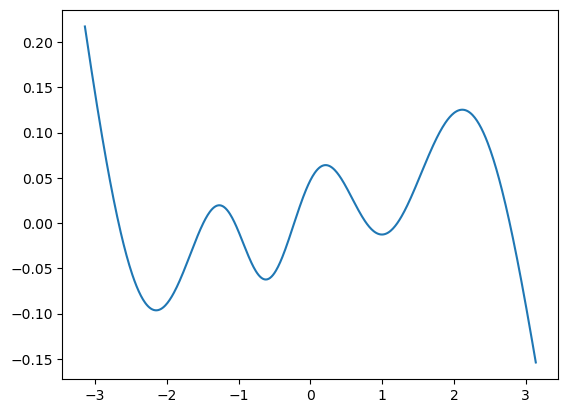

In [16]:
print(res.shape)
print(y.shape)
ey=y-res.reshape(-1)
plt.plot(x,ey)
plt.show()

MSE Mean squared error (Cредний квадрат ошибки)

RMSE Root Mean Square Error(Среднеквадратичная ошибка)

MAE Mean absolute error

In [17]:
sum=0
for i in range(ey.size):
  sum=sum+(ey[i]*ey[i])
mseRes=sum/ey.size
rmseRes=np.sqrt(sum/ey.size)
print(mseRes)
print(rmseRes)
sum=0
for i in range(ey.size):
  sum=sum+np.abs(ey[i])
maeRes=sum/ey.size
print(maeRes)

0.004861905639954951
0.06972736650666617
0.05546239187298997


In [18]:
print(model)
print(type(model))
weights=  model.get_weights()
weights_old=weights.copy()
print(weights)
print(weights[0]) # w1
print(weights[1]) # b1
print(weights[2]) # v2
print(weights[3]) # b2

#model.load_weights(weights)
w=weights[0]
print(w.size)
print(w.shape)
print(w[0][1]) #2й вес в первом слое

<Sequential name=sequential, built=True>
<class 'keras.src.models.sequential.Sequential'>
[array([[ 2.013287  , -3.2537527 ,  0.54451793]], dtype=float32), array([-0.92797124, -2.9472947 , -0.13151135], dtype=float32), array([[ 3.9148884],
       [-1.5743067],
       [-7.3594565]], dtype=float32), array([2.3598435], dtype=float32)]
[[ 2.013287   -3.2537527   0.54451793]]
[-0.92797124 -2.9472947  -0.13151135]
[[ 3.9148884]
 [-1.5743067]
 [-7.3594565]]
[2.3598435]
3
(1, 3)
-3.2537527


Вообще-то раз на раз не приходится и не всегда выходит хороший результат. В этом можно убедиться, если несколько раз позапускать код.

**Пример "хороших" весов:**

w=[-1.5310479  2.1643085 -1.821241 ]

b=[-0.05832653 -5.8256836  -5.166113 ]

v=[-2.8325238]

 [-1.8532212]

 [ 2.2218437]

b=[1.3785975]

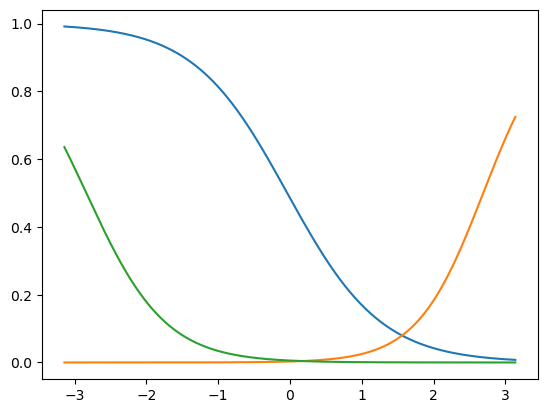

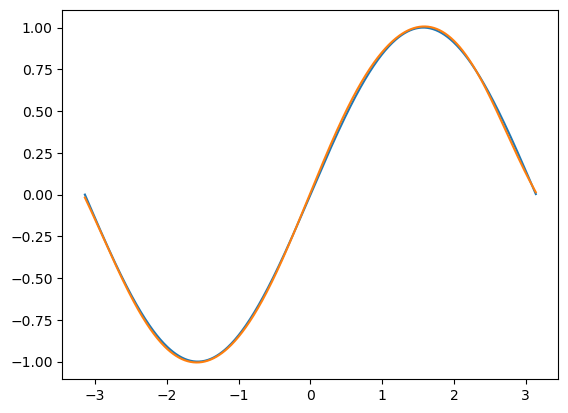

In [19]:
a1=np.zeros(x.size)
a2=np.zeros(x.size)
a3=np.zeros(x.size)

w1=-1.5310479
w2=2.1643085
w3=-1.821241
b1=-0.05832653
b2=-5.8256836
b3= -5.166113
for i in range(x.size):
  a1[i]=x[i]*w1+b1
  a2[i]=x[i]*w2+b2
  a3[i]=x[i]*w3+b3
y1=np.zeros(x.size)
y2=np.zeros(x.size)
y3=np.zeros(x.size)

for i in range(x.size):
  y1[i]=Sigmoid(a1[i])
  y2[i]=Sigmoid(a2[i])
  y3[i]=Sigmoid(a3[i])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

z=np.zeros(x.size)
v1=-2.8325238
v2=-1.8532212
v3=2.2218437
bb1=1.3785975

for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+v3*y3[i]+bb1;
plt.plot(x,F(x))
plt.plot(x,z)
plt.show()

Тут показана структура списка массивов весов

weights[0] - веса первого слоя (вообще-то двумерный массив, но т.к. вход один, то вглядит как вектор)

weights[1] - сдвиги для первого слоя

weights[2] - веса между первым и вторым слоем ( опять-же. обычно двухмерный массив, но т.к. выход только один, то выгялдит как вектор)

weights[3] - сдвиги выходгого слоя

In [20]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)

(1, 3)
(3,)
(3, 1)
(1,)


In [21]:
w1=weights[0][0][0]
w2=weights[0][0][1]  # поменяем в сети на -5
w3=weights[0][0][2]

b1=weights[1][0]
b2=weights[1][1]
b3=weights[1][2]

v1=weights[2][0][0]
v2=weights[2][1][0]
v3=weights[2][2][0]

b4=weights[3][0]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step


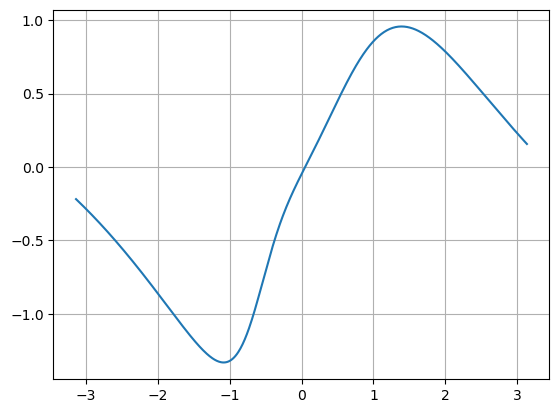

In [22]:
weights[0][0][1] = -5
model.set_weights(weights)
res=model.predict(x)
plt.plot(x,res)
plt.grid(True)
plt.show()

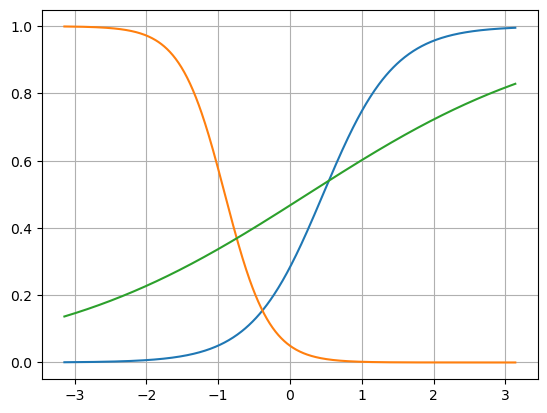

In [23]:
a1=np.zeros(x.size)
a2=np.zeros(x.size)
a3=np.zeros(x.size)


for i in range(x.size):
  a1[i]=x[i]*w1+b1
  a2[i]=x[i]*w2+b2
  a3[i]=x[i]*w3+b3

y1=np.zeros(x.size)
y2=np.zeros(x.size)
y3=np.zeros(x.size)

for i in range(x.size):
  y1[i]=Sigmoid(a1[i])
  y2[i]=Sigmoid(a2[i])
  y3[i]=Sigmoid(a3[i])

#x=x/np.pi
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.grid(True)
plt.show()


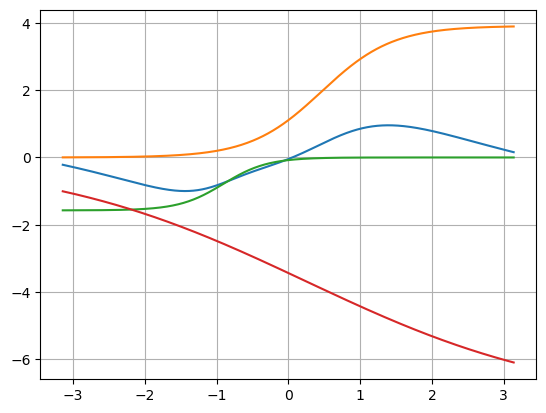

In [24]:
z=np.zeros(x.size)

for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+ v3*y3[i]+b4;
plt.plot(x,z)
plt.plot(x,y1*v1)
plt.plot(x,y2*v2)
plt.plot(x,y3*v3)
plt.grid(True)
plt.show()

Ну а на два нейрона выйдет?

/Users/iveeliz/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


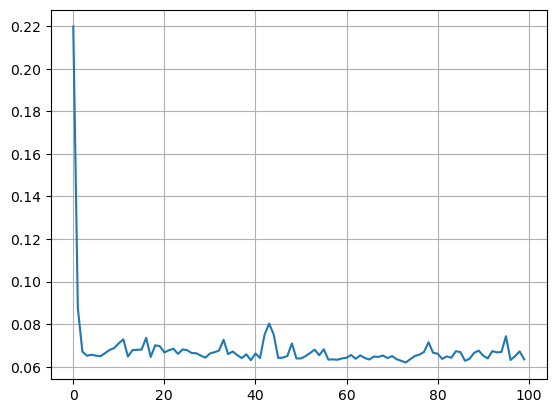

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


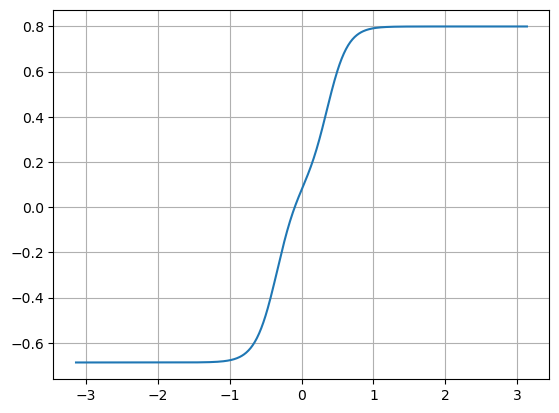

[array([[7.021027 , 6.6960373]], dtype=float32), array([-2.5295954,  2.3285272], dtype=float32), array([[0.70561457],
       [0.78203714]], dtype=float32), array([-0.68762094], dtype=float32)]


In [25]:
model2 = keras.Sequential()
model2.add(Dense(units=2, input_shape=(1,), activation='sigmoid'))
model2.add(Dense(units=1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
log = model2.fit(x, y, epochs=100, verbose=False)
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()
res=model2.predict(x)
plt.plot(x,res)
plt.grid(True)
plt.show()
weights2=model2.get_weights()
print(weights2)

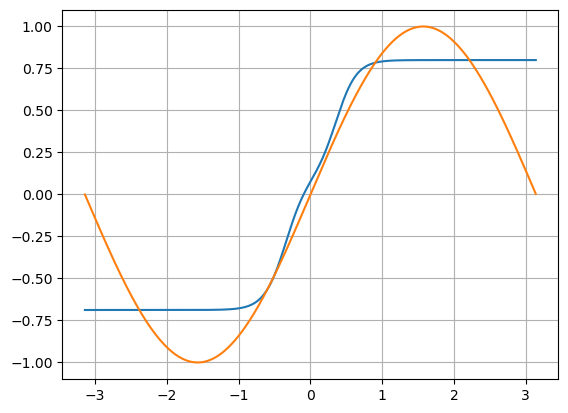

In [26]:
plt.plot(x,res)
plt.plot(x,y)
plt.grid(True)
plt.show()

Пропробуем сохранить веса и перезалить в дургую модель с такой-же структурой, но другим адамом

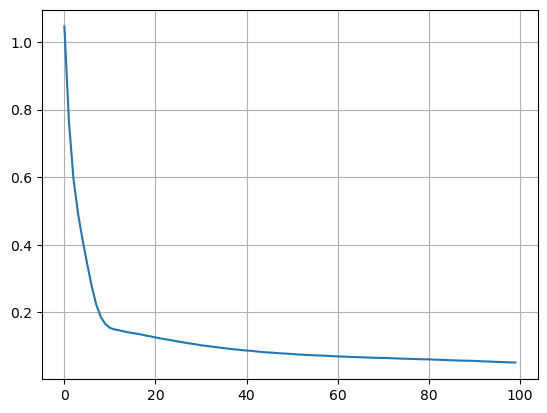

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step


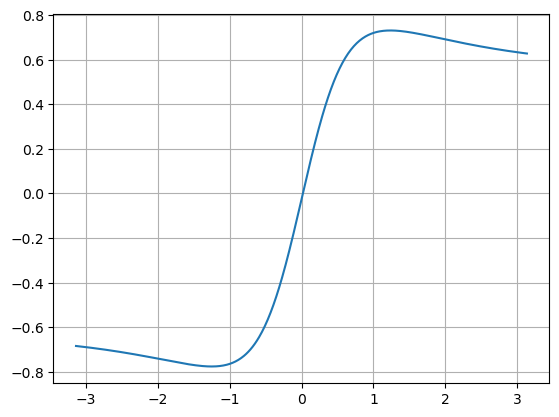

In [27]:
model3 = keras.Sequential()
model3.add(Dense(units=2, input_shape=(1,), activation='sigmoid'))
model3.add(Dense(units=1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.01))
log = model3.fit(x, y, epochs=100, verbose=False)
plt.plot(log.history['loss'])
plt.grid(True)
plt.show()
res=model3.predict(x)
plt.plot(x,res)
plt.grid(True)
plt.show()
weights3=model3.get_weights()
#print(weights3)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step


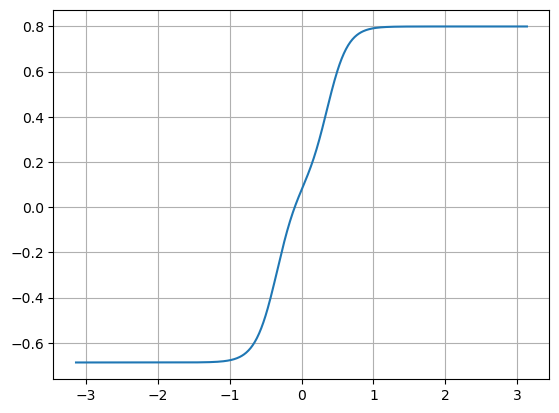

In [28]:
model3.set_weights(weights2)
res=model3.predict(x)
plt.plot(x,res)
plt.grid(True)
plt.show()

Сеть повторила предыдущую. Загрузим ее веса назад:

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step


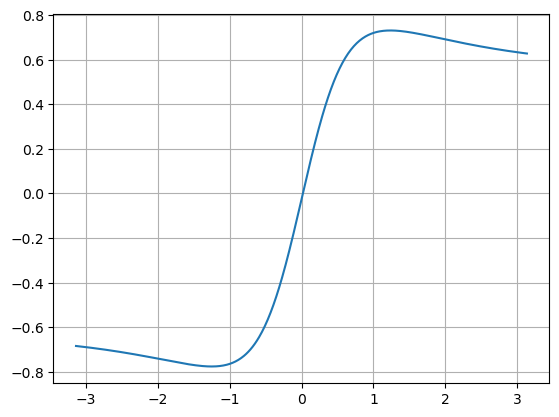

In [29]:
model3.set_weights(weights3)
res=model3.predict(x)
plt.plot(x,res)
plt.grid(True)
plt.show()

# Домашнее задание

Попробуйте самостоятельно создать и обучить полносвязную сеть апроксимирующую $cos(x)$ от $-\pi$ до $\pi$.

Нейронов в скрытом слое задайте 3, а потом 7, и посмотрите как изменился результат

## Функция

In [30]:
def F(x):
  res=np.cos(x)
  return res

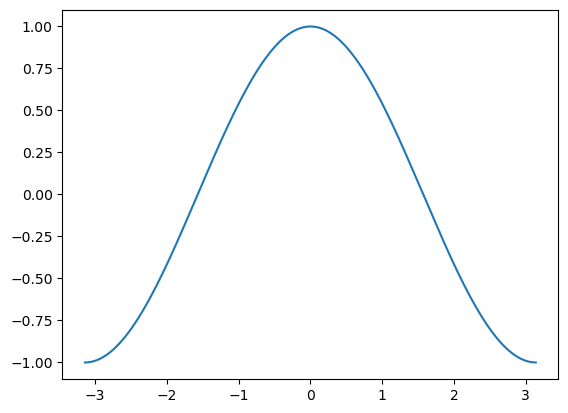

629


In [31]:
x=np.arange(-np.pi, np.pi, 0.01)

y=np.zeros(x.size)
for i in range(x.size):
  y[i]=F(x[i])
plt.plot(x,y)
plt.show()
print(x.size)

## Ручная настройка весов

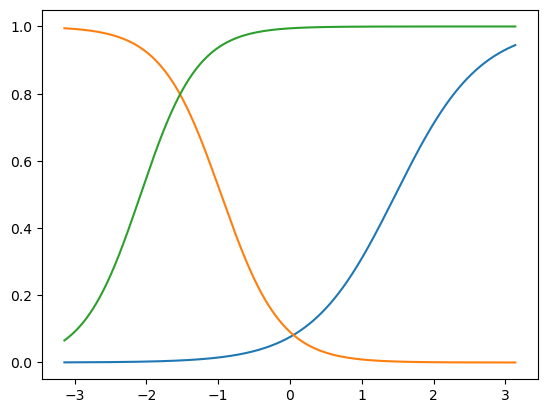

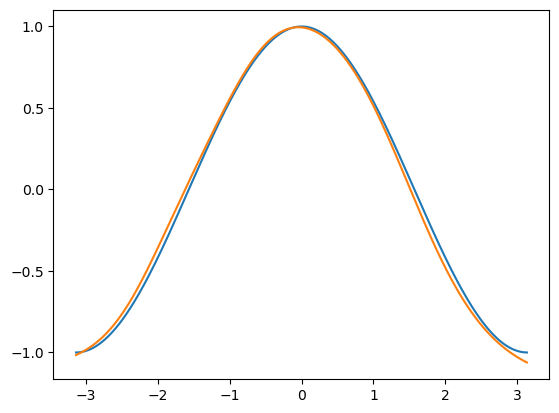

In [32]:
a1=np.zeros(x.size)
a2=np.zeros(x.size)
a3=np.zeros(x.size)

w1=1.7
w2=-2.4
w3=2.5
b1=-2.5
b2=-2.3
b3=5.2
for i in range(x.size):
  a1[i]=x[i]*w1+b1
  a2[i]=x[i]*w2+b2
  a3[i]=x[i]*w3+b3
y1=np.zeros(x.size)
y2=np.zeros(x.size)
y3=np.zeros(x.size)

for i in range(x.size):
  y1[i]=Sigmoid(a1[i])
  y2[i]=Sigmoid(a2[i])
  y3[i]=Sigmoid(a3[i])
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

z=np.zeros(x.size)
v1=-2.5
v2=-1.2
v3=1.2
bb1=0.1

for i in range(x.size):
  z[i]=v1*y1[i]+v2*y2[i]+v3*y3[i]+bb1;
plt.plot(x,F(x))
plt.plot(x,z)
plt.show()

## KERAS

### 3 нейрона

In [33]:
model_3n = keras.Sequential()
model_3n.add(Input(shape=(1,)))
model_3n.add(Dense(units=3, input_shape=(1,), activation='sigmoid'))  # 3 нейрона
model_3n.add(Dense(units=1, activation='linear'))
model_3n.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
log_3n = model_3n.fit(x, y, epochs=100, verbose=False)
res_3n = model_3n.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


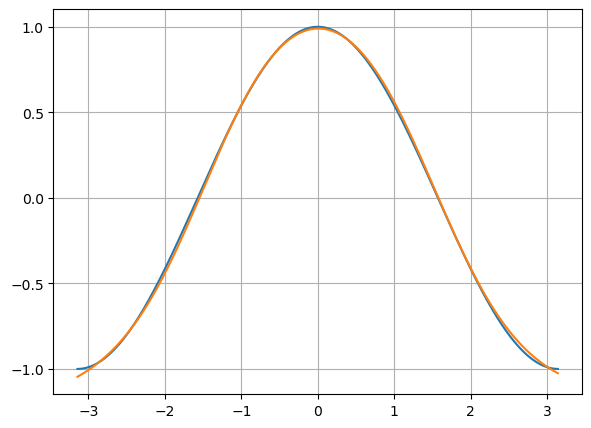

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.plot(x, res_3n)
plt.grid(True)

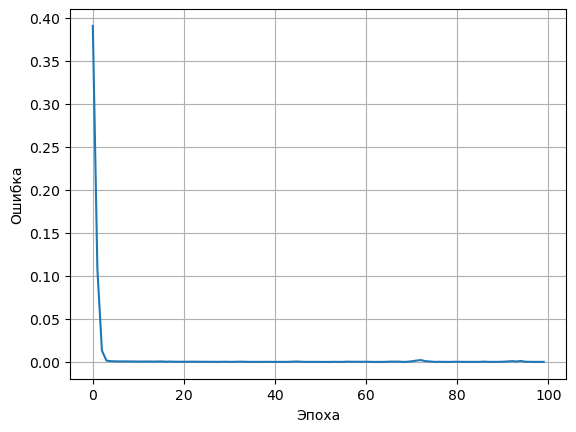

In [35]:
plt.plot(log_3n.history['loss'])
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

(629, 1)
(629,)


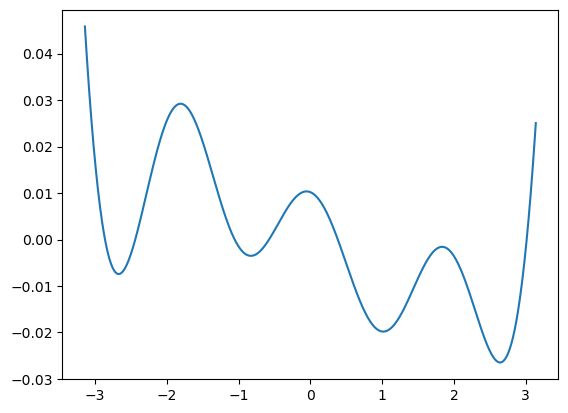

In [36]:
print(res_3n.shape)
print(y.shape)
ey=y-res_3n.reshape(-1)
plt.plot(x,ey)
plt.show()

In [37]:
sum=0
for i in range(ey.size):
  sum=sum+(ey[i]*ey[i])
mseRes=sum/ey.size
rmseRes=np.sqrt(sum/ey.size)
print(mseRes)
print(rmseRes)
sum=0
for i in range(ey.size):
  sum=sum+np.abs(ey[i])
maeRes=sum/ey.size
print(maeRes)

0.0002203188063406429
0.014843140043152693
0.011838094684424878


### 7 нейронов

In [38]:
model_7n = keras.Sequential()
model_7n.add(Input(shape=(1,)))
model_7n.add(Dense(units=7, input_shape=(1,), activation='sigmoid'))  # 3 нейрона
model_7n.add(Dense(units=1, activation='linear'))
model_7n.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
log_7n = model_7n.fit(x, y, epochs=100, verbose=False)
res_7n = model_7n.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


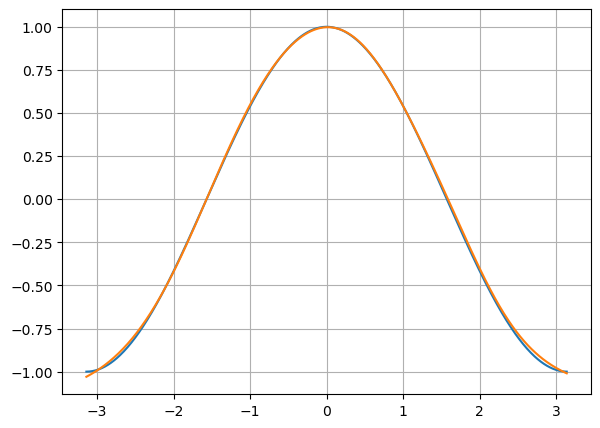

In [39]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.plot(x, res_7n)
plt.grid(True)

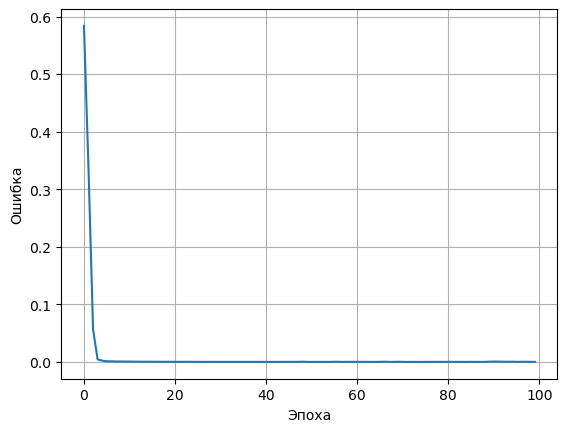

In [40]:
plt.plot(log_7n.history['loss'])
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.grid(True)
plt.show()

(629, 1)
(629,)


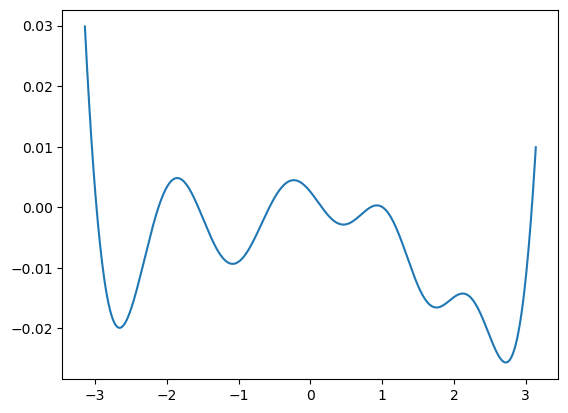

In [41]:
print(res_7n.shape)
print(y.shape)
ey=y-res_7n.reshape(-1)
plt.plot(x,ey)
plt.show()

In [42]:
sum=0
for i in range(ey.size):
  sum=sum+(ey[i]*ey[i])
mseRes=sum/ey.size
rmseRes=np.sqrt(sum/ey.size)
print(mseRes)
print(rmseRes)
sum=0
for i in range(ey.size):
  sum=sum+np.abs(ey[i])
maeRes=sum/ey.size
print(maeRes)

0.0001295706767016274
0.01138291160914585
0.008668926673256225
